<a href="https://www.kaggle.com/code/mayarmohamedswilam/heart-attack-analysis-prediction?scriptVersionId=144606472" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# # **Heart Attack Analysis & Prediction using data analysis & data visualization & machine learning & deep learning**

**The "Heart Attack Analysis & Prediction Dataset" is a dataset used for heart attack classification":**

* Background:
* 
* The dataset is designed for the classification of heart attacks, a critical medical condition.
* It is used for analytical and machine learning tasks related to predicting the likelihood of a heart attack based on various medical attributes.
* Dataset Size:
* 
* The dataset contains 304 rows (samples) and 14 columns (features).
* Features:
* 
* The dataset includes several features (attributes) that provide information about patients and their health conditions. These features can be used to predict the likelihood of a heart attack. Some of the key features include:
* age: The age of the patient.
* sex: The gender of the patient (0 = female, 1 = male).
* cp: Chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).
* trestbps: Resting blood pressure (in mm Hg).
* chol: Serum cholesterol level (in mg/dl).
* fbs: Fasting blood sugar (> 120 mg/dl) (1 = true, 0 = false).
* restecg: Resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = probable or definite left ventricular hypertrophy).
* thalach: Maximum heart rate achieved.
* exang: Exercise-induced angina (1 = yes, 0 = no).
* oldpeak: ST depression induced by exercise relative to rest.
* slope: Slope of the peak exercise ST segment.
* ca: Number of major vessels colored by fluoroscopy.
* thal: Thalassemia (a type of blood disorder) results (3 = normal, 6 = fixed defect, 7 = reversible defect).
* Target Variable:
* 
* The target variable in this dataset is often output or target, which indicates the presence (1) or absence (0) of a heart attack

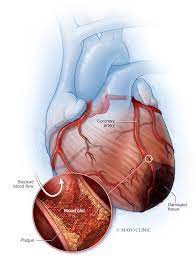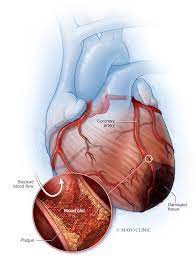

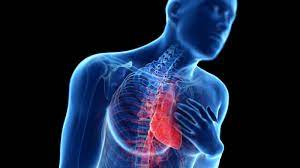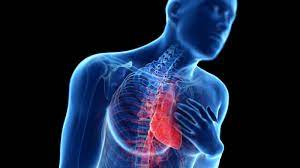

* Importing Libraries:
* 
* The code starts by importing necessary libraries, including pandas, numpy, matplotlib.pyplot, seaborn, and plotly.express. These libraries are used for data manipulation, analysis, and visualization.
* Data Loading:
* 
* The dataset is loaded from a CSV file named 'heart.csv' using pd.read_csv(). The loaded data is stored in a DataFrame named df.
* Data Exploration:
* 
* df.info() is used to display information about the dataset, including data types and the number of non-null values in each column.
* df.isnull().sum() checks for missing values in each column and shows the count of missing values (which is zero in this case).
* df.duplicated().sum() checks for duplicated rows, and since there's one duplicated row, it is removed using df.drop_duplicates().
* Data Visualization:
* 
* Several data visualizations are created to explore the dataset:
* A histogram showing the distribution of ages.
* Boxplots and count plots to visualize relationships between variables, such as cholesterol levels by gender and the distribution of chest pain types.
* Pie charts to display the distribution of heart disease, chest pain types, fasting blood sugar levels, exercise-induced angina, and more.
* Histograms of numerical features.
* Outlier Removal:
* 
* A custom function Remove_outliers is defined to remove outliers using the Interquartile Range (IQR) method. Outliers are replaced with NaN values.
* Numerical Feature Boxplots:
* 
* A custom function boxplot_drawer is defined to draw boxplots for numerical features. These boxplots visualize the distribution and presence of outliers in these features.
* Correlation Matrix:
* 
* A correlation matrix is computed using df.corr(). The matrix is then visualized as a heatmap using Seaborn's sns.heatmap(). This helps visualize the relationships between different features in the dataset.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools

In [ ]:
#read csv file  
df=pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df[df.duplicated()]

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

In [ ]:
for col in df.columns:
    print(f'column {col}')
    print('***********************************')
    print(df[col].value_counts(),'\n')

In [ ]:
df.describe() 

In [ ]:
# drow boxplot of PhysicalHealth
def boxplot_drawer(Column_Name):
    sns.boxplot(y=Column_Name,data=df)

In [ ]:
def Remove_outliers(Column_Name):
    q1=df[Column_Name].quantile(0.25)
    q3=df[Column_Name].quantile(0.75)
    iqr=q3-q1
    df[Column_Name][(df[Column_Name]<(q1-1.5*iqr))|(df[Column_Name]>(q3+1.5*iqr))]=np.nan

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace=True)

In [ ]:
g = sns.PairGrid(df[['age', 'trtbps', 'chol', 'thalachh', 'output']], hue='output', palette='husl')
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot, kde_kws={'color': 'k'})
g.map_lower(sns.kdeplot, cmap='Blues_d')
g.add_legend()
g.fig.suptitle('PairGrid of Selected Variables')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='output', y='age', data=df, palette='Set1')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.title('Age Distribution by Heart Disease')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cp', y='chol', data=df, ci='sd', palette='pastel')
plt.xlabel('Chest Pain Type')
plt.ylabel('Average Cholesterol Level')
plt.title('Average Cholesterol Level by Chest Pain Type')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='cp', y='age', data=df, hue='output', split=True, palette='Set2')
plt.xlabel('Chest Pain Type')
plt.ylabel('Age')
plt.title('Age vs. Chest Pain Type with Heart Disease')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['age'], df['thalachh'], c=df['output'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (thalachh)')
plt.title('Age vs. Max Heart Rate')
plt.colorbar(label='Heart Disease')
plt.show()

In [ ]:
sns.pairplot(df[['age', 'trtbps', 'chol', 'thalachh', 'output']], hue='output', diag_kind='kde', palette='husl')
plt.suptitle('Pairwise Relationships and Distributions')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=20, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [ ]:
import seaborn as sns

sns.boxplot(x='sex', y='chol', data=df)
plt.xlabel('Sex')
plt.ylabel('Cholesterol Level')
plt.title('Cholesterol Level by Sex')
plt.show()

In [ ]:
import seaborn as sns

sns.countplot(x='cp', data=df)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Distribution of Chest Pain Type')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
labels = ['No Heart Disease', 'Heart Disease']
sizes = df['output'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Heart Disease')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
labels = ['Type 0', 'Type 1', 'Type 2', 'Type 3']
sizes = df['cp'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen', 'lightyellow'])
plt.title('Distribution of Chest Pain Type')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
labels = ['Fasting Sugar < 120 mg/dl', 'Fasting Sugar >= 120 mg/dl']
sizes = df['fbs'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Fasting Blood Sugar')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
labels = ['Type 0', 'Type 1', 'Type 2']
sizes = df['restecg'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Distribution of Resting Electrocardiographic Results')
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
labels = ['No', 'Yes']
sizes = df['exng'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Exercise-Induced Angina')
plt.show()

In [ ]:
# Explore the distribution of numerical features
numeric_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
df[numeric_features].hist(bins=15, figsize=(12, 6))
plt.show()

In [ ]:
# Explore the distribution of categorical features
plt.figure(figsize=(12, 6))
sns.countplot(x='sex', data=df, hue='output')
plt.title('Distribution of Heart Disease by Gender')
plt.show()

In [ ]:
color = '#a9cce3'
df.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 18
plt.show()

In [ ]:
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
f,ax = plt.subplots(figsize=(15,12))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr,cmap=cmap,mask=mask,linewidth=0.5,square=True,center=0)

In [ ]:
df

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1,fmt=".2f")

* Data Preprocessing:
* 
* The code starts by importing necessary libraries, such as pandas, scikit-learn, and various modules from scikit-learn.
* It reads a dataset into a DataFrame named df.
* Numeric features in the dataset, namely 'trtbps', 'chol', 'thalachh', and 'oldpeak', are standardized using StandardScaler. This step is crucial for many machine learning algorithms to perform effectively.
* Logistic Regression Model:
* 
* A logistic regression model is created and trained on the dataset.
* The data is split into training and testing sets using train_test_split.
* The model is fitted to the training data using fit.
* Predictions are made on the test set using predict.
* The model's performance is evaluated using accuracy, a classification report, and a confusion matrix.
* Decision Tree Classifier Model:
* 
* Another classification model based on a Decision Tree Classifier is created and trained.
* Similar to the logistic regression model, it is fitted to the training data, predictions are made on the test set, and its performance is evaluated.
* Feature Importance Analysis:
* 
* Feature importance for the Decision Tree Classifier model is calculated, and the most important features are displayed.
* Support Vector Classifier (SVC) Model:
* 
* An SVC model is created and trained.
* The model's performance is evaluated.
* Support Vector Regressor (SVR) Model:
* 
* An SVR model is created and trained (note: this seems to be mistakenly using the SVC model for predictions).
* K Neighbors Classifier Model:
* 
* A K Neighbors Classifier model is created and trained.
* The model's performance is evaluated.
* Random Forest Classifier Model:
* 
* A Random Forest Classifier model is created and trained.
* The model's performance is evaluated.
* Hyperparameter Tuning with GridSearchCV:
* 
* A pipeline is set up that includes a StandardScaler and a classifier (Logistic Regression and SVC).
* Hyperparameters are defined for the models, and GridSearchCV is used to find the best hyperparameters for both models.
* The best hyperparameters and the test accuracy are printed.
* Deep Learning with TensorFlow/Keras:
* 
* The code moves into deep learning using TensorFlow/Keras.
* An RNN (Recurrent Neural Network) model is created with one or more LSTM layers.
* The model is compiled, trained, and evaluated using binary cross-entropy loss and accuracy.
* Hyperparameter Tuning for RNN with GridSearchCV:
* 
* A function is defined to create an RNN model with different hyperparameters (units, dropout rate, and learning rate).
* GridSearchCV is used to search for the best hyperparameters for the RNN model.
* Summary:
* 
* The code prints the best hyperparameters and test accuracy for the tuned RNN model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop(columns=['output'])
y = df['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression ,LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC ,SVR

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import r2_score, mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score

In [ ]:
#data preprocessing
numeric_columns = ['trtbps', 'chol', 'thalachh', 'oldpeak']

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the data and transform the selected columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(X_train,y_train)
y_pred_LR = LR_model.predict(X_test)

# Model Evaluation
print("Score the X-train with Y-train is : ", LR_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LR_model.score(X_test,y_test))
print("Model Evaluation Logistic R : mean absolute error is ", mean_absolute_error(y_test,y_pred_LR))
print("Model Evaluation Logistic R : mean squared  error is " , mean_squared_error(y_test,y_pred_LR))
print("Model Evaluation Logistic R : median absolute error is " ,median_absolute_error(y_test,y_pred_LR)) 

print("Model Evaluation Logistic R : accuracy score " , accuracy_score(y_test,y_pred_LR))

In [ ]:
#DecisionTreeClassifier

Tree_model=DecisionTreeClassifier(max_depth=10)

# fit model
Tree_model.fit(X_train,y_train)
y_pred_T =Tree_model.predict(X_test)

# Score X and Y - test and train
print("Score the X-train with Y-train is : ", Tree_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Tree_model.score(X_test,y_test))
print("Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_T))

In [ ]:
#DecisionTreeClassifier

Tree_model=DecisionTreeClassifier(max_depth=10)

# fit model
Tree_model.fit(X_train,y_train)
y_pred_T =Tree_model.predict(X_test)

# Score X and Y - test and train
print("Score the X-train with Y-train is : ", Tree_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Tree_model.score(X_test,y_test))
print("Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_T))

In [ ]:
# Model Preperation:
X = df.drop(columns="output")
y = df.output
      
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=3)
print(X.shape)
print(y.shape)

In [ ]:
# Select  Important columns

a = Tree_model.feature_importances_.tolist()
df_result=pd.DataFrame()
df_result["Columns"] = X_train.columns
df_result["Important Rate"] = a
df_result = df_result.sort_values(by="Important Rate", ascending=False)

df_result=df_result.reset_index(drop=True)

df_result

In [ ]:
# using the model SVC
svc_model=SVC()

# fit model
svc_model.fit(X_train,y_train)

y_pred_svc =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svc_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svc_model.score(X_test,y_test))
print("Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svc))

In [ ]:
# using the model SVR

svr_model=SVR(degree=1,coef0=1, tol=0.001, C=1.5,epsilon=0.001)

# fit model
svr_model.fit(X_train,y_train)

y_pred_svr =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svr_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svr_model.score(X_test,y_test))
print("Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svr))

In [ ]:
# using the model K Neighbors Classifier

K_model = KNeighborsClassifier(n_neighbors = 11)
K_model.fit(X_train, y_train)

y_pred_k = K_model.predict(X_test)

print("Score the X-train with Y-train is : ", K_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", K_model.score(X_test,y_test))
print("Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_k))

In [ ]:
# using the model Random Forest Classifier

RF_model = RandomForestClassifier(n_estimators = 300)
RF_model.fit(X_train, y_train)

y_pred_r = RF_model.predict(X_test)

print("Score the X-train with Y-train is : ", RF_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", RF_model.score(X_test,y_test))
print("Model Evaluation Random Forest Classifier : accuracy score " , accuracy_score(y_test,y_pred_r))

In [ ]:
# Using GridSearchCv
pipe = Pipeline([
    ("scl", StandardScaler()),
    ("Classifier", LogisticRegression())
])

# Define the parameter grid for LogisticRegression
param_grid = [
    {"Classifier": [LogisticRegression()],
     "Classifier__C": np.logspace(-3, 3, 50),
     "Classifier__penalty": ["l1", "l2"],
     "Classifier__solver": ["liblinear"]
    }
    ,
     {"Classifier": [SVC()], 
      "Classifier__C": np.logspace(-3, 3, 50),
      "Classifier__degree": np.arange(1,5),
      "Classifier__gamma": ["scale","auto"],
      "Classifier__decision_function_shape":["ovo", "ovr"]
     }
    ]

# Perform GridSearchCV with only Logistic Regression
g_search = GridSearchCV(pipe, param_grid=param_grid, scoring="f1", cv=10, n_jobs=-1)

In [ ]:
g_search.fit(X_train, y_train)

In [ ]:
print("Best Train Score: ", g_search.best_score_)
print("Best Params: ", g_search.best_params_)
print("Best Test Score : ",g_search.score(X_test, y_test))

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['output'])
y = df['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional, but often beneficial)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape data for RNN input (sequence length, number of features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the RNN model
model = keras.Sequential([
    layers.SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define your RNN model
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

# Plot training history (loss and accuracy)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Plot training & validation loss values
plt.subplot(121)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

# Define a function to create the RNN model
def create_rnn_model(units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(units=units, dropout=dropout_rate, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

# Wrap the Keras model in a scikit-learn classifier
rnn_classifier = KerasClassifier(build_fn=create_rnn_model, epochs=10, batch_size=32, verbose=0)

# Define the hyperparameters to search
param_grid = {
    'units': [50, 100],
    'dropout_rate': [0.2, 0.4],
    'learning_rate': [0.001, 0.01]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rnn_classifier, param_grid=param_grid, cv=3, verbose=2)

# Perform the grid search on your data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evaluate the best model on the test set
accuracy = best_estimator.score(X_test, y_test)
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

In [ ]:
test_accuracy = 0.8524590134620667 

# Convert the test accuracy to a percentage string
accuracy_percentage = f"{test_accuracy * 100:.2f}%"

# Print the accuracy as a percentage
print(f"Test Accuracy: {accuracy_percentage}")